<a href="https://colab.research.google.com/github/syedanida/end2end-modeling-with-Deep-Learning/blob/main/end2end_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade kagglehub

In [2]:
!pip uninstall wandb -y

Found existing installation: wandb 0.15.0
Uninstalling wandb-0.15.0:
  Successfully uninstalled wandb-0.15.0


In [3]:
!pip install --upgrade wandb

  Using cached wandb-0.19.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached wandb-0.19.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (20.9 MB)


In [4]:
!pip install wandb==0.15.0

  Using cached wandb-0.15.0-py3-none-any.whl.metadata (8.0 kB)
Using cached wandb-0.15.0-py3-none-any.whl (2.0 MB)
  Attempting uninstall: wandb
    Found existing installation: wandb 0.19.6
    Uninstalling wandb-0.19.6:
      Successfully uninstalled wandb-0.19.6


In [5]:
!pip uninstall tensorflow keras -y

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0


In [6]:
!pip install keras==2.15.0

  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)


In [7]:
!pip install tensorflow==2.15.0 keras==2.15.0

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.


In [8]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import wandb
# from wandb.keras import WandbCallback

In [9]:
# Download dataset
path = kagglehub.dataset_download("camnugent/california-housing-prices")
df = pd.read_csv(path + '/housing.csv')

# Check the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# Drop missing values (if any)
df = df.dropna()

# Features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Convert categorical feature to numeric
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
import wandb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Initialize WandB for experiment tracking
wandb.init(project="california-housing-price-prediction")

# Build the deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model without WandbCallback
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Log metrics manually using WandB
wandb.log({"loss": history.history["loss"], "val_loss": history.history["val_loss"]})


Epoch 1/50
409/409 [==============================] - 2s 3ms/step - loss: 55984750592.0000 - val_loss: 54771482624.0000
Epoch 2/50
409/409 [==============================] - 2s 5ms/step - loss: 52106092544.0000 - val_loss: 47466074112.0000
Epoch 3/50
409/409 [==============================] - 1s 3ms/step - loss: 41253433344.0000 - val_loss: 34164027392.0000
Epoch 4/50
409/409 [==============================] - 1s 3ms/step - loss: 28036560896.0000 - val_loss: 22859065344.0000
Epoch 5/50
409/409 [==============================] - 1s 3ms/step - loss: 19919456256.0000 - val_loss: 18141966336.0000
Epoch 6/50
409/409 [==============================] - 1s 2ms/step - loss: 17252235264.0000 - val_loss: 16887144448.0000
Epoch 7/50
409/409 [==============================] - 1s 2ms/step - loss: 16468144128.0000 - val_loss: 16322287616.0000
Epoch 8/50
409/409 [==============================] - 1s 2ms/step - loss: 16017266688.0000 - val_loss: 15901207552.0000
Epoch 9/50
409/409 [====================

In [31]:
# Split the data correctly
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (16512, 13)
Shape of X_test: (4128, 13)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


In [32]:
# Make predictions
y_pred = model.predict(X_test)

# Reshape y_pred to 1D (if necessary)
y_pred = y_pred.reshape(-1)

129/129 [==============================] - 0s 927us/step


In [33]:
# Check if the lengths match
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

Length of y_test: 4128
Length of y_pred: 4128


In [34]:
# Check for NaNs in X_train and X_test:
print(f"NaNs in X_train: {np.isnan(X_train).any()}")
print(f"NaNs in X_test: {np.isnan(X_test).any()}")

NaNs in X_train: False
NaNs in X_test: True


In [35]:
# If NaNs are found, impute them using a suitable method
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Check for NaNs in y_test and y_pred
print(f"NaNs in y_test: {np.isnan(y_test).any()}")
print(f"NaNs in y_pred: {np.isnan(y_pred).any()}")

# Remove NaNs from both y_test and y_pred by matching the indices
mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]

# Metrics
mae = mean_absolute_error(y_test_clean, y_pred_clean)
mse = mean_squared_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

# Log metrics to WandB
wandb.log({"mae": mae, "mse": mse, "r2_score": r2})

# Print out the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


NaNs in y_test: False
NaNs in y_pred: True
Mean Absolute Error: 91250.36592184163
Mean Squared Error: 13225857405.875769
R^2 Score: -0.006450249012874165


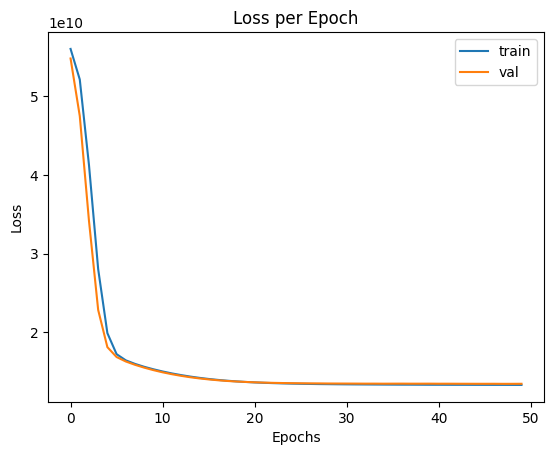

In [49]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

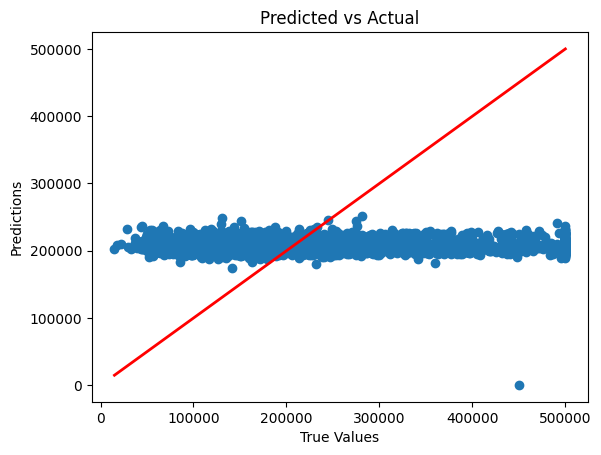

In [50]:
# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Predicted vs Actual")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [44]:
# Log model parameters and metrics
wandb.log({"MAE": mae, "MSE": mse, "R2": r2})
wandb.log({"Loss": history.history['loss'][-1], "Validation Loss": history.history['val_loss'][-1]})

# Save model
wandb.save('california-housing-model.h5')

[]

In [45]:
# Save the trained model
model.save("california-housing-model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


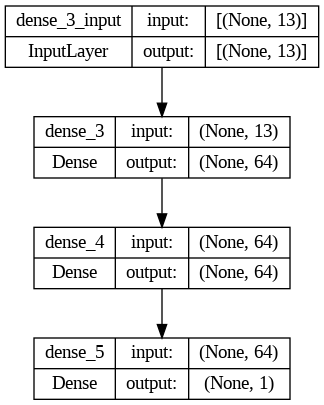

In [46]:
# Model summary
model.summary()

# Plot the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

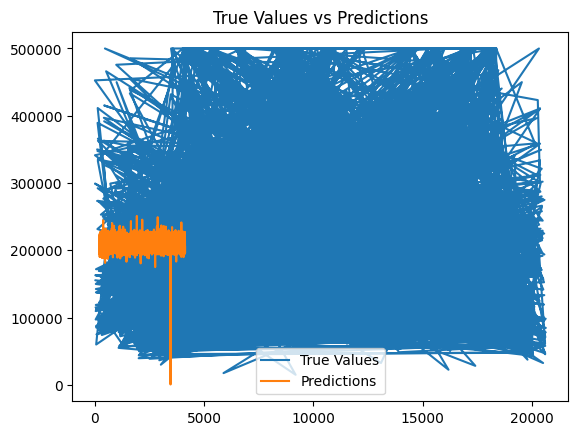

In [51]:
# Plot the R² score for regression analysis
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.title("True Values vs Predictions")
plt.legend()
plt.savefig("true_vs_predicted.png")  # Save the plot as an image file
plt.show()

# Log metrics and artifacts
wandb.log({"True vs Predicted": wandb.Image("true_vs_predicted.png")})
wandb.log({"Model Architecture": wandb.Html("model_architecture.html")})